In [1]:
import pandas as pd ## Import all the packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

color = sns.color_palette() ## seaborn palette for beautiful plots
df = pd.read_csv("/Users/Rishi/Desktop/timeseries_events.csv") ## 
df1 = pd.read_csv("/Users/Rishi/Desktop/timeseries_users.csv") ## 
print(" The data set has", len(df), "rows") 
print(" The data set has", len(df1), "rows")


 The data set has 30593 rows
 The data set has 96 rows


In [7]:
df.head()

,user_id,event_date
0,0,2015-02-26 00:00:00
1,0,2015-03-10 00:00:00
2,0,2015-03-30 00:00:00
3,0,2015-02-15 00:00:00
4,0,2015-02-18 00:00:00


In [8]:
df1.head()

,age,gender,user_id
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4


## EDA

In [10]:
event_date = df['event_date'].astype('datetime64[ns]') ## convert object to datatime format 

In [13]:
s1 = pd.merge(df, df1, how ='left', on=['user_id'])  ## merge casedf and demodf 
# s1["age"] = "" ## create an empty variable age and set it to null
s1.head()

,user_id,event_date,age,gender
0,0,2015-02-26 00:00:00,51.0,f
1,0,2015-03-10 00:00:00,51.0,f
2,0,2015-03-30 00:00:00,51.0,f
3,0,2015-02-15 00:00:00,51.0,f
4,0,2015-02-18 00:00:00,51.0,f


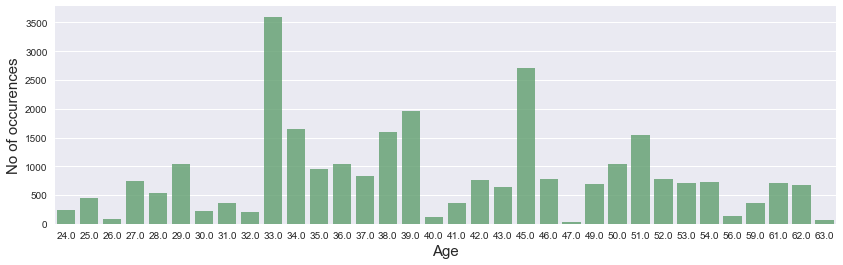

In [14]:
convictage = s1['age'].value_counts()
convictage.head()

plt.figure(figsize=(14,4))
sns.barplot(convictage.index, convictage.values, alpha=0.8, color=color[1])
plt.ylabel('No of occurences', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.show()




In [17]:
s2 = s1[['user_id', 'event_date', 'age', 'gender']].groupby(['user_id', 'event_date']).agg(['mean', 'count'])
s2.head()

age      
                             mean count
user_id event_date                     
0       2015-01-15 00:00:00  51.0     2
        2015-01-16 00:00:00  51.0     2
        2015-01-17 00:00:00  51.0     3
        2015-01-18 00:00:00  51.0     2
        2015-01-19 00:00:00  51.0     2

In [37]:
 counts = s1.groupby('user_id').size()
 counts
 d1f = counts.to_frame().reset_index()
 d1f.head()
 d1f = d1f.rename(columns={'user_id': 'USER-ID', 0: 'TOTAL-EVENTS'})
 d1f.head()
# counts_df = pd.DataFrame(df.groupby('user_id').size().rename('counts'))
# counts_df.head()
# counts_df.column()

,USER-ID,TOTAL-EVENTS
0,0,148
1,1,509
2,2,126
3,3,65
4,4,247


In [42]:
d2f = pd.read_csv("/Users/Rishi/Desktop/timeseries_users.csv") ## 
# df2.head()
d2f = d2f.rename(columns={'age': 'AGE', 'gender': 'GENDER', 'user_id': 'USER-ID'})
d2f.head()



,AGE,GENDER,USER-ID
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4


In [44]:
d1 = pd.merge(d1f, d2f, how ='left', on=['USER-ID'])  ## merge casedf and demodf 
d1.head()


,USER-ID,TOTAL-EVENTS,AGE,GENDER
0,0,148,51.0,f
1,1,509,49.0,f
2,2,126,35.0,m
3,3,65,63.0,m
4,4,247,27.0,f


## Plot a histogram of total number of events per user for all male users who are 30+ years old.

In [52]:
d2m = d1[(d1["AGE"] > 30) & (d1["GENDER"] == 'm')]
d2m

,USER-ID,TOTAL-EVENTS,AGE,GENDER
2,2,126,35.0,m
3,3,65,63.0,m
12,12,1705,45.0,m
17,17,147,51.0,m
21,21,254,41.0,m
23,23,129,56.0,m
31,31,271,42.0,m
33,33,51,52.0,m
38,38,391,34.0,m
40,40,10,41.0,m


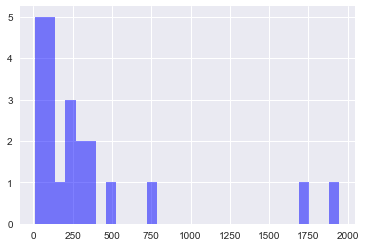

In [94]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
x = d2m['TOTAL-EVENTS']
num_bins = 30
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

## TOTAL-EVENTS - X Label
## Frequency - Y Label.

## ------- 

In [100]:
## we first convert timestamps from string to date / time format and store the value in a new column "time_f"
from datetime import datetime as dt
time_t = lambda x: dt.strptime(x, "%Y-%m-%d %H:%M:%S")
s1["time_f"] = s1["event_date"].map(time_t)
s1.head()

,user_id,event_date,age,gender,time_f
0,0,2015-02-26 00:00:00,51.0,f,2015-02-26
1,0,2015-03-10 00:00:00,51.0,f,2015-03-10
2,0,2015-03-30 00:00:00,51.0,f,2015-03-30
3,0,2015-02-15 00:00:00,51.0,f,2015-02-15
4,0,2015-02-18 00:00:00,51.0,f,2015-02-18


In [101]:
# we do that again store the value in the new column "time_i" and shift the row of 1 step
s1["time_i"] = s1["event_date"].map(time_t)
s1["time_i"] = s1["time_i"].shift(1)

In [102]:
s1.head()

,user_id,event_date,age,gender,time_f,time_i
0,0,2015-02-26 00:00:00,51.0,f,2015-02-26,NaT
1,0,2015-03-10 00:00:00,51.0,f,2015-03-10,2015-02-26
2,0,2015-03-30 00:00:00,51.0,f,2015-03-30,2015-03-10
3,0,2015-02-15 00:00:00,51.0,f,2015-02-15,2015-03-30
4,0,2015-02-18 00:00:00,51.0,f,2015-02-18,2015-02-15


In [103]:

# we now define a function to compute the time interval between two timestamps in second and apply it to our dataframe

def time_interval(df):
    """
    INPUTS:
    - df: dataframe with columns 'time_f' and 'time_i'
    
    OUTPUTS:
    - time in second between the two timestamps 'time_f' and 'time_i'
    """
    return (df["time_f"] - df["time_i"]).total_seconds()

s1["time_interval"] = s1.apply(time_interval, axis=1)

In [104]:
s1.head()

,user_id,event_date,age,gender,time_f,time_i,time_interval
0,0,2015-02-26 00:00:00,51.0,f,2015-02-26,NaT,NaN
1,0,2015-03-10 00:00:00,51.0,f,2015-03-10,2015-02-26,1036800.0
2,0,2015-03-30 00:00:00,51.0,f,2015-03-30,2015-03-10,1728000.0
3,0,2015-02-15 00:00:00,51.0,f,2015-02-15,2015-03-30,-3715200.0
4,0,2015-02-18 00:00:00,51.0,f,2015-02-18,2015-02-15,259200.0


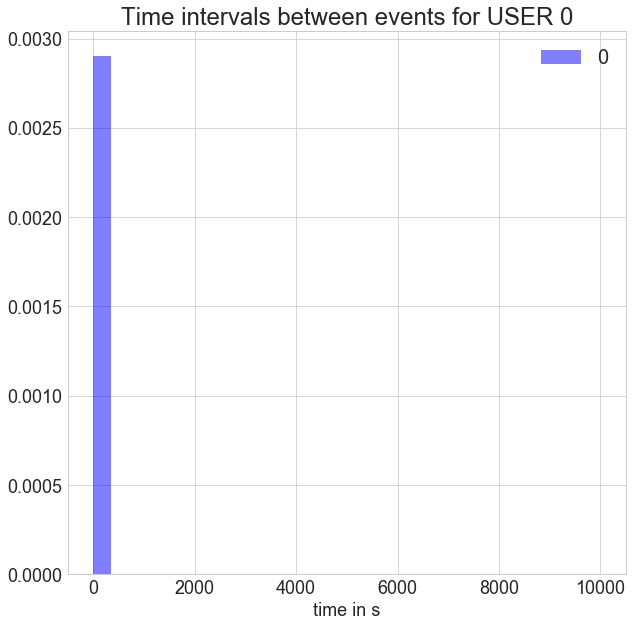

In [112]:

# Any results you write to the current directory are saved as output.

c = {'axes.titlesize': 24,
     'axes.labelsize': 18,
     'axes.suptitlesize': 20,
     'legend.fontsize': 20,
     'xtick.labelsize': 18,
     'ytick.labelsize': 18,
     'lines.linewidth': 3,
     'lines.markersize': 10,
     'axes.grid': False,
     'pdf.fonttype': 42,
     'ps.fonttype': 42}

# first, we drop rows with nan
s1 = s1.dropna()

time_int_i = s1["time_interval"].values

# normalized histogram
sns.set_style("whitegrid")
sns.set_context("paper", rc=c)

plt.figure(figsize=(10, 10))
bins = np.linspace(0, 10000, 30)
h = plt.hist(time_int_i, bins, normed=1, color="b",label = "0", alpha=0.5)

plt.legend()
plt.xlabel("time in s")
plt.title("Time intervals between events for USER 0")

In [114]:
# # normalized histogram
# sns.set_style("whitegrid")
# sns.set_context("paper", rc=c)

# fig = plt.figure(figsize=(10, 20))

# bins = np.linspace(0, 600000, 30)

# for j in range(5):
#     ax = plt.subplot2grid((5, 1), (j, 0))
#     i = s1[j]
#     events_i = s1[s1.user_id == i]
#     s1["time_f"] = s1["timestamp"].map(time_t)
#     s1["time_i"] = s1["timestamp"].map(time_t)
#     s1["time_i"] = s1["time_i"].shift(1)
#     s1["time_interval"] = s1.apply(time_interval, axis=1)
#     s1 = s1.dropna()
#     time_int_i = s1["time_interval"].values
#     h = ax.hist(time_int_i, bins, normed=1, label=str(i), alpha=0.5)
#     ax.legend()
#     ax.set_xlabel("time in s")
#     ax.set_ylim([0., 0.00003])

# fig.tight_layout()